In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_19=pd.read_csv('Jan_2019_ontime.csv')
df_20=pd.read_csv('Jan_2020_ontime.csv')

In [27]:
print("Summary statics for 2019Data:")
print(df_19.describe())
print("Summary statics for 2020Data:")
print("\n",df_20.describe())

Summary statics for 2019Data:
        DAY_OF_MONTH    DAY_OF_WEEK  OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM  \
count  583985.000000  583985.000000          583985.000000      583985.000000   
mean       15.960088       3.835626           19983.213168        2537.869334   
std         8.987942       1.921899             377.724638        1821.736145   
min         1.000000       1.000000           19393.000000           1.000000   
25%         8.000000       2.000000           19790.000000         979.000000   
50%        16.000000       4.000000           19977.000000        2114.000000   
75%        24.000000       5.000000           20368.000000        3902.000000   
max        31.000000       7.000000           20452.000000        7439.000000   

       ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  DEST_AIRPORT_ID  \
count      583985.000000           5.839850e+05    583985.000000   
mean        12659.701982           1.265974e+06     12659.470015   
std          1519.405493           1

In [28]:
print(df_19.isnull().sum())

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64


In [29]:
print(df_20.isnull().sum())

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    698
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   6664
DEP_DEL15                  6699
DEP_TIME_BLK                  0
ARR_TIME                   7075
ARR_DEL15                  8078
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              607346
dtype: int64


In [30]:
print(df_19.dtypes)
for col in df_19.select_dtypes(include='object'):
    print(f'{df_19[col].nunique()} unique values')

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
Unnamed: 21              float64
dtype: object
17 unique values
17 unique values
5446 unique values
346 unique values
346 unique values
19 unique values


In [31]:
print(df_20.dtypes)
for col in df_20.select_dtypes(include='object'):
    print(f'{df_20[col].nunique()} unique values')

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
Unnamed: 21              float64
dtype: object
17 unique values
17 unique values
5444 unique values
351 unique values
350 unique values
19 unique values


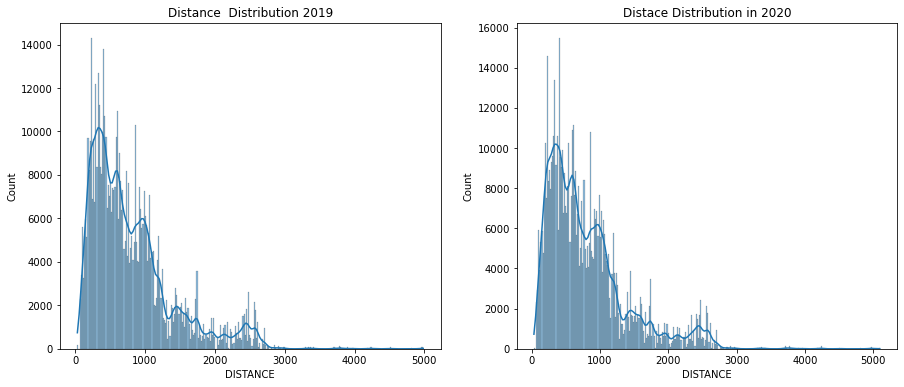

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df_19['DISTANCE'],kde=True)
plt.title("Distance  Distribution 2019")
plt.subplot(1,2,2)
sns.histplot(df_20['DISTANCE'],kde=True)
plt.title('Distace Distribution in 2020')
plt.show()

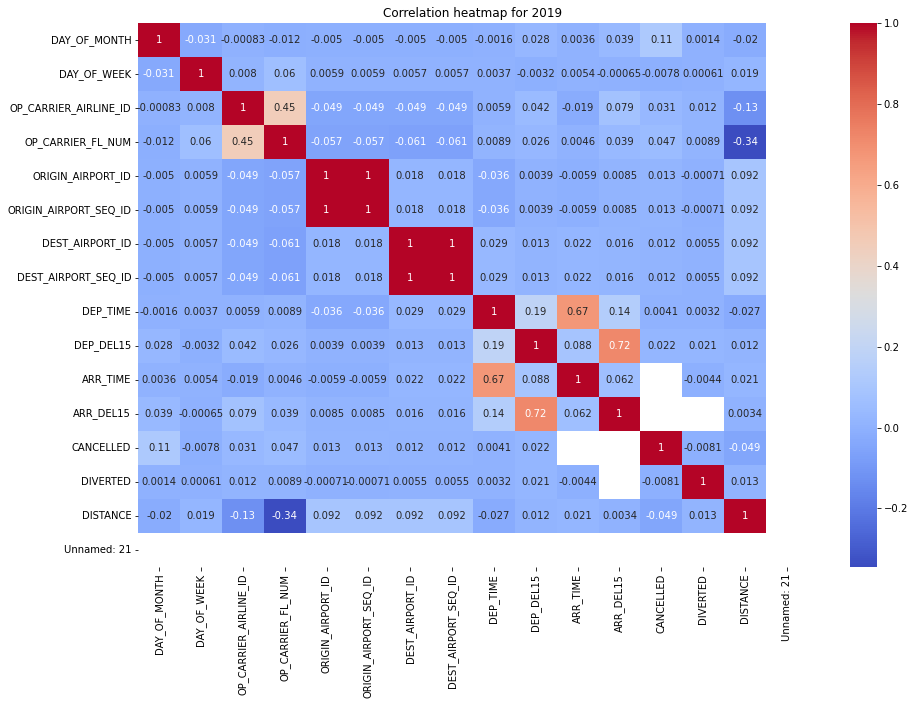

In [33]:
cor_19=df_19.corr()
cor_20=df_20.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor_19,annot=True,cmap='coolwarm')
plt.title("Correlation heatmap for 2019")
plt.show()

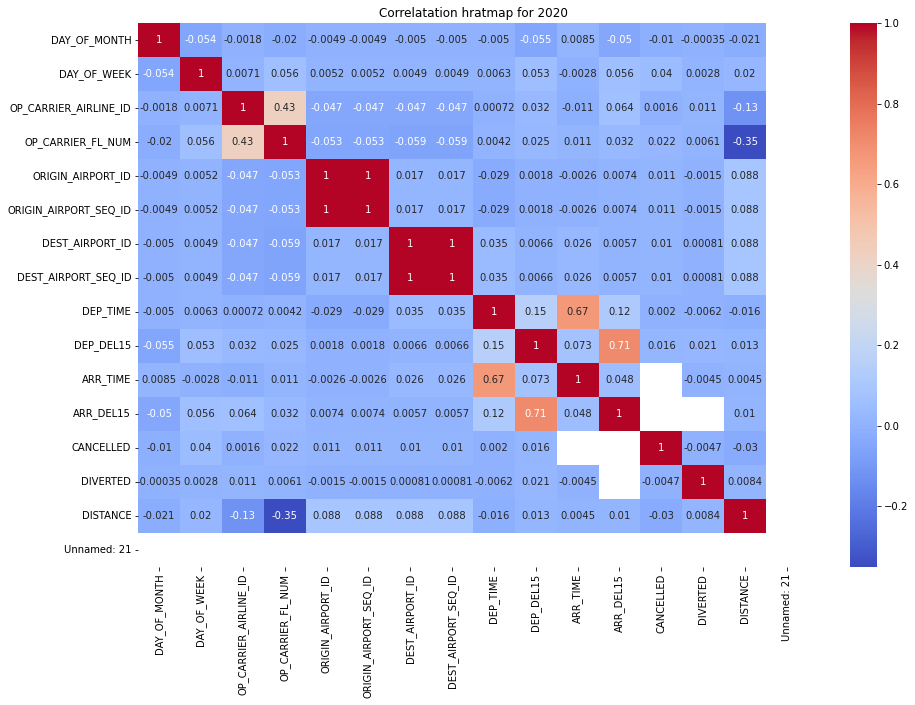

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(cor_20,annot=True,cmap='coolwarm')
plt.title("Correlatation hratmap for 2020")
plt.show()

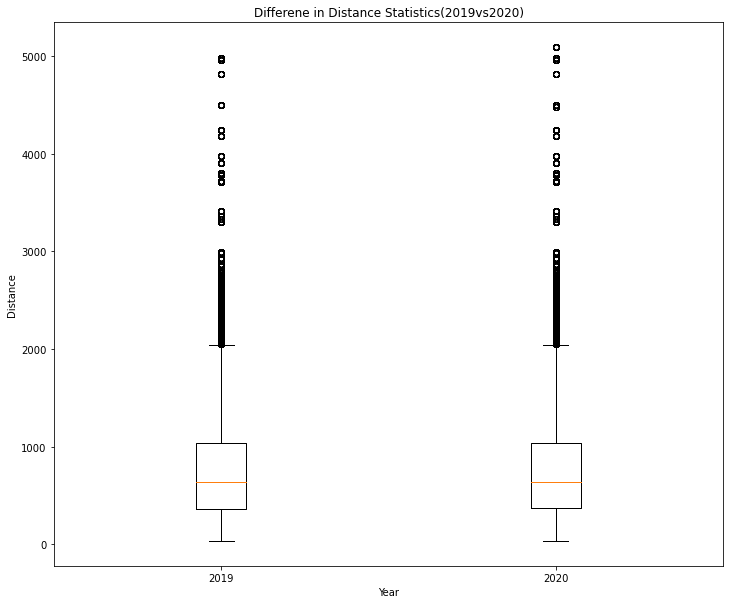

In [35]:
plt.figure(figsize=(12,10))
plt.boxplot([df_19["DISTANCE"],df_20["DISTANCE"]],labels=['2019','2020'])
plt.title('Differene in Distance Statistics(2019vs2020)')
plt.xlabel('Year')
plt.ylabel('Distance')
plt.show()

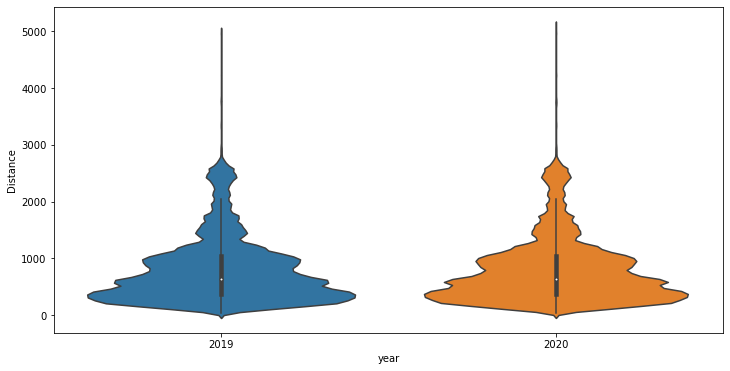

In [36]:
df_19['Year']=2019
df_20['Year']=2020
#print(df_19)
cd=pd.concat([df_19,df_20])
plt.figure(figsize=(12,6))
sns.violinplot(x='Year',y='DISTANCE',data=cd)
plt.xlabel('year')
plt.ylabel('Distance')
plt.show()


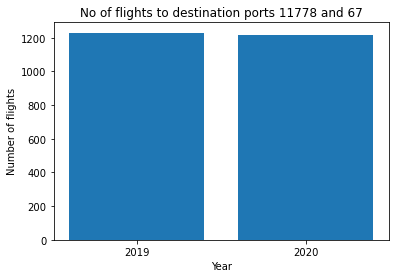

In [37]:
#destinations=[]
destinations=[11778,11267]
dest_c=pd.DataFrame({'Year':['2019','2020'],'DAI':destinations,
                    'counts':[df_19[df_19['DEST_AIRPORT_ID'].isin(destinations) ]['DEST_AIRPORT_ID'].count(),
                             df_20[df_20['DEST_AIRPORT_ID'].isin(destinations)]['DEST_AIRPORT_ID'].count()]})
plt.bar(dest_c['Year'],dest_c['counts'])
plt.xlabel('Year')
plt.ylabel('Number of flights')
plt.title('No of flights to destination ports 11778 and 67')
plt.show()

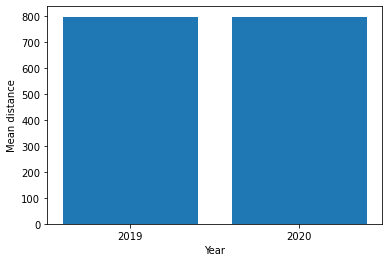

In [38]:
md19=df_19['DISTANCE'].mean()
md20=df_20['DISTANCE'].mean()
y=['2019','2020']
md=[md19,md20]
plt.bar(y,md)
plt.xlabel('Year')
plt.ylabel('Mean distance')
plt.show()

In [43]:
# WE need to install plotly library before executing the sunburst plot code
pip install plotly

In [40]:
import plotly.express as px
df_19['Year']=2019
df_20['Year']=2020
cd=pd.concat([df_19,df_20])
fig=px.sunburst(cd,path=['Year','OP_UNIQUE_CARRIER','OP_CARRIER','DEST'],values='DISTANCE',title='sunbars plot of flights data')
fig.show()